<a href="https://colab.research.google.com/github/AdithyaChengalvala/soybean-leaf-disease-cnn/blob/main/Soybean_Disease_Classification_MLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn. model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical


In [ ]:
IMAGE_SIZE = [224, 224]


train_path = '/content/drive/MyDrive/Final_Soybean/Train1'
valid_path = '/content/drive/MyDrive/Final_Soybean/Test1'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Final_Soybean/Train1')

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(2, activation='softmax')(x)
print(inception.input)
# create a model object
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = "same",input_shape = (224, 224, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Conv2D(16, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(8, activation = "relu"))
model.add(Dense(2, activation='softmax'))
model.summary()

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor_342>


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_190 (Conv2D)                  │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_191 (Conv2D)                  │ (None, 74, 74, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 37, 37, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 21904)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │         175,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 180,778 (706.16 KB)

 Trainable params: 180,778 (706.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./224,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./224)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Final_Soybean/Train1',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')


path = '/content/drive/MyDrive/Final_Soybean/Train1'  # Replace with your actual directory path

for file in os.listdir(path):
    print(file)


Found 153 images belonging to 2 classes.
Frogeye_Leaf_Spot
brown_spot


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Final_Soybean/Test1',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')
for file in os.listdir(path):
    print(file)

Found 38 images belonging to 2 classes.
Frogeye_Leaf_Spot
brown_spot


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7774 - loss: 0.4533 - val_accuracy: 1.0000 - val_loss: 0.0496
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9768 - loss: 0.0545 - val_accuracy: 1.0000 - val_loss: 0.0090
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9890 - loss: 0.0284 - val_accuracy: 0.9737 - val_loss: 0.0417
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9827 - loss: 0.0431 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9981 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 8.4567e-04
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9875 - loss: 0.0233 - val_accuracy: 1.0000 - val_loss: 0.0077
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9882 - loss: 0.0423 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 1.0000 - val_l

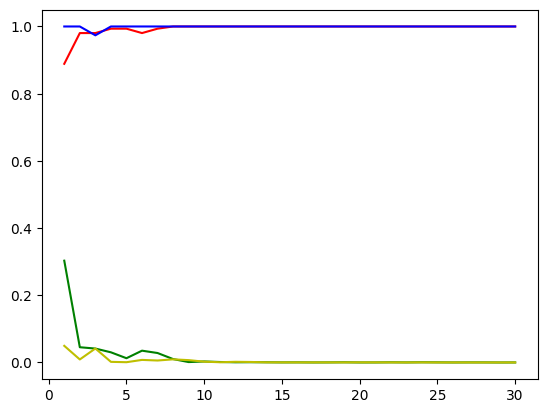

In [ ]:
%matplotlib inline
plt.ion()



accuracy = r.history['accuracy']
val_accuracy = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

# Filter accuracy and loss data
filtered_accuracy = [a for a in accuracy if a != 0] # Filter accuracy data
filtered_loss = [l for l in loss if l != 0]  # Filter loss data
epochs = range(1, len(filtered_accuracy) + 1)  # Adjust epoch range



# Plot the filtered data
plt.plot(epochs, filtered_accuracy, color='r', label='train')
plt.plot(epochs, val_accuracy, color='b', label='val')  # Use original validation data
plt.plot(epochs, filtered_loss, color='g', label='loss')
plt.plot(epochs, val_loss, color='y', label='val_loss')  # Use original validation data
plt.show()
plt.pause(5)


In [ ]:
import pandas as pd

# Assuming 'r' is the variable storing the training history (as in your provided code)

# Create a dictionary with the data
data = {
     'Epoch': (np.arange(1, len(r.history['accuracy']) + 1) / 2) + 0.5, # Convert to NumPy array
    'Accuracy': r.history['accuracy'],

}


# Create a pandas DataFrame
df = pd.DataFrame(data)
filtered_df =  df[df['Accuracy'] != 0]

# Display the table
print(filtered_df)


    Epoch  Accuracy
0     1.0  0.888889
1     1.5  0.980392
2     2.0  0.980392
3     2.5  0.993464
4     3.0  0.993464
5     3.5  0.980392
6     4.0  0.993464
7     4.5  1.000000
8     5.0  1.000000
9     5.5  1.000000
10    6.0  1.000000
11    6.5  1.000000
12    7.0  1.000000
13    7.5  1.000000
14    8.0  1.000000
15    8.5  1.000000
16    9.0  1.000000
17    9.5  1.000000
18   10.0  1.000000
19   10.5  1.000000
20   11.0  1.000000
21   11.5  1.000000
22   12.0  1.000000
23   12.5  1.000000
24   13.0  1.000000
25   13.5  1.000000
26   14.0  1.000000
27   14.5  1.000000
28   15.0  1.000000
29   15.5  1.000000
